In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fat=pd.read_csv ("C:/Users/Admin/Desktop/Data Analytics-Edubridge/4.Advanced Python Libraries/Python Dataset/Bodyfat.csv")

In [6]:
fat.shape

(100, 10)

In [7]:
fat.head()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7


In [8]:
fat.isnull().sum()

Bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Ankle      0
Biceps     0
Wrist      0
dtype: int64

In [9]:
fat.dtypes

Bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Ankle      float64
Biceps     float64
Wrist      float64
dtype: object

In [10]:
fat_x=fat.iloc[:,1:10]
fat_y=fat.iloc[:,0]

In [11]:
import sklearn
from sklearn.model_selection import train_test_split

In [12]:
fat_x_train,fat_x_test,fat_y_train,fat_y_test=train_test_split(fat_x,fat_y,test_size=0.2,random_state=101)

In [13]:
fat_x_train.shape,fat_x_test.shape,fat_y_train.shape,fat_y_test.shape

((80, 9), (20, 9), (80,), (20,))

In [14]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [15]:
lin.fit(fat_x_train,fat_y_train)

LinearRegression()

In [16]:
lin_pred=lin.predict(fat_x_test)
lin_pred

array([15.41197371, 17.91203514, 26.208229  ,  9.3065253 , 17.19781033,
       15.71986914, 15.34343669, 21.22376038, 25.84124476, 16.21750878,
       18.27546378, 39.00246209, 20.47627265,  8.77596068, 14.96708907,
       20.22014099, 11.11652802, 23.21648546, 14.95396894, 11.90256257])

In [17]:
lin.intercept_

-26.414007864142643

In [18]:
lin.coef_

array([ 0.06561437, -0.09792121, -0.04315683,  0.04636035, -0.05303367,
        0.9669442 ,  0.12517199,  0.12278188, -1.63202775])

In [19]:
R2=lin.score(fat_x_train,fat_y_train)
R2

0.7341409715528517

In [20]:
adjR2=1-(((1-R2)*(80-1))/(80-9-1))
adjR2

0.6999590964667899

In [37]:
from sklearn import metrics

In [39]:
new_MSE=metrics.mean_squared_error(fat_y_test,lin_pred)
new_MSE


12.471778557724864

In [40]:
data_RMSE=pow(new_MSE,0.5)
data_RMSE


3.5315405360444134

In [21]:
fat.corr()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
Bodyfat,1.000000,0.255798,0.595959,0.032210,0.504443,0.682266,0.811593,0.387911,0.418107,0.373095
Age,0.255798,1.000000,-0.097905,-0.268673,0.038501,0.072908,0.141339,-0.073522,-0.079398,0.216315
Weight,0.595959,-0.097905,1.000000,0.568433,0.838977,0.916047,0.888317,0.790388,0.786266,0.755123
Height,0.032210,-0.268673,0.568433,1.000000,0.370396,0.345312,0.265403,0.454985,0.435460,0.420928
Neck,0.504443,0.038501,0.838977,0.370396,1.000000,0.789799,0.769086,0.664068,0.701067,0.777259
Chest,0.682266,0.072908,0.916047,0.345312,0.789799,1.000000,0.922728,0.700092,0.730124,0.695795
Abdomen,0.811593,0.141339,0.888317,0.265403,0.769086,0.922728,1.000000,0.643211,0.652148,0.672061
Ankle,0.387911,-0.073522,0.790388,0.454985,0.664068,0.700092,0.643211,1.000000,0.650841,0.688320
Biceps,0.418107,-0.079398,0.786266,0.435460,0.701067,0.730124,0.652148,0.650841,1.000000,0.630473
Wrist,0.373095,0.216315,0.755123,0.420928,0.777259,0.695795,0.672061,0.688320,0.630473,1.000000


In [32]:
df1=pd.DataFrame({"Actual":fat_y_test,"predicted":lin_pred})
#df1

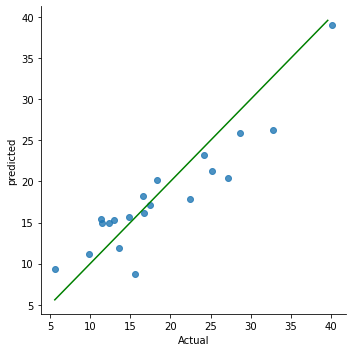

In [33]:
sns.lmplot(x="Actual",y="predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Lasso()

In [22]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [23]:
lasso.fit(fat_x_train,fat_y_train)

Lasso()

In [24]:
lasso.coef_ # Some of the coefficient become 0 in lasso

array([ 0.02545641, -0.12008555, -0.        , -0.        ,  0.        ,
        0.90888185, -0.        ,  0.        , -0.        ])

In [25]:
fat_p=lasso.predict(fat_x_test)
fat_p

array([15.67944522, 18.60513806, 24.96997058, 10.53667308, 19.67153334,
       15.41822321, 17.54278745, 20.57246591, 25.84366172, 15.8743779 ,
       18.69801572, 36.13596732, 18.58247264,  8.50619386, 14.61878037,
       19.85991708, 10.78515012, 23.55760269, 14.61950513, 12.20629682])

In [26]:
Lr2=lasso.score(fat_x_train,fat_y_train)
Lr2

0.7199996489639864

In [27]:
Ladr2=1-(((1-Lr2)*(80-1))/(80-9-1))
Ladr2

0.6839996038307846

In [28]:
fat_df=pd.DataFrame({"Importance":list(lasso.coef_),"Columns":list(fat_x)})
fat_df

,Importance,Columns
0,0.025456,Age
1,-0.120086,Weight
2,-0.000000,Height
3,-0.000000,Neck
4,0.000000,Chest
5,0.908882,Abdomen
6,-0.000000,Ankle
7,0.000000,Biceps
8,-0.000000,Wrist


In [35]:
df2=pd.DataFrame({"Actual":fat_y_test,"predicted":fat_p})
df2


,Actual,predicted
16,11.3,15.679445
1,22.5,18.605138
43,32.8,24.969971
67,5.6,10.536673
89,17.4,19.671533
21,14.9,15.418223
97,13.0,17.542787
51,25.2,20.572466
6,28.7,25.843662
41,16.7,15.874378


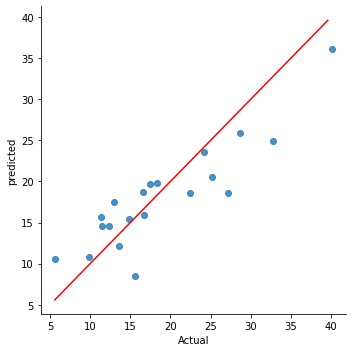

In [36]:
sns.lmplot(x="Actual",y="predicted",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")
plt.show()


# Ridge()

In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [27]:
ridge.fit(fat_x_train,fat_y_train)

Ridge()

In [28]:
r_prd=ridge.predict(fat_x_test)
r_prd

array([15.40503502, 17.9399589 , 26.14918607,  9.36883469, 17.28044985,
       15.69413187, 15.42842452, 21.19025731, 25.86106059, 16.20452421,
       18.26659661, 38.91850368, 20.39418227,  8.77568888, 14.96599625,
       20.23161328, 11.08558904, 23.26846669, 14.95548572, 11.93590389])

In [29]:
list(ridge.coef_)

[0.063790565882896,
 -0.09805131017744001,
 -0.04589234442974952,
 0.031467428066212465,
 -0.05192175457637038,
 0.9659288962398962,
 0.11048140868784423,
 0.11964361420648445,
 -1.5535144317314928]

In [30]:
da1=pd.DataFrame({"Coeff":list(ridge.coef_),"Columns":list(fat_x)})
da1

,Coeff,Columns
0,0.063791,Age
1,-0.098051,Weight
2,-0.045892,Height
3,0.031467,Neck
4,-0.051922,Chest
5,0.965929,Abdomen
6,0.110481,Ankle
7,0.119644,Biceps
8,-1.553514,Wrist


In [31]:
rdr2=ridge.score(fat_x_train,fat_y_train)
rdr2

0.7341155756527902

In [32]:
rdadr2=1-(((1-rdr2)*(80-1))/(80-9-1))
rdadr2

0.6955816011097162

In [33]:
list1 = ["Linear","Lasso","ridge"]
list2 = [R2,Lr2,rdr2]
list3 = [adjR2,Ladr2,rdadr2]


In [34]:
final = pd.DataFrame({'modelname':list1,"R-Square":list2,"Adj_R-Square":list3})
final


,modelname,R-Square,Adj_R-Square
0,Linear,0.734141,0.699959
1,Lasso,0.720000,0.684000
2,ridge,0.734116,0.695582


# Forward Elimination

In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [58]:
sfs = SFS(LinearRegression(),k_features=5,forward=True,floating=False,scoring = 'r2',cv = 0)


In [85]:
sfs.fit(fat_x,fat_y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=5, scoring='r2')

In [86]:
sfs.k_feature_names_


('Age', 'Weight', 'Chest', 'Abdomen', 'Wrist')

In [87]:
sfs.k_score_


0.7558669049390692

# Backward Elimination 

In [81]:
sfs2 = SFS(LinearRegression(),k_features=5,forward=False,floating=False,scoring = 'r2',cv = 0)

In [88]:
sfs2.fit(fat_x,fat_y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=5, scoring='r2')

In [89]:
sfs2.k_feature_names_


('Age', 'Weight', 'Chest', 'Abdomen', 'Wrist')

In [90]:
sfs2.k_score_

0.7558669049390692

In [ ]:
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)